# oasis infobyte: data science internship

# task 4:spam detection using machine learning

# name: SANDRA SWETHA KIRANMAI MAY p1 batch

# imporing necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
df=pd.read_csv("spam.csv",encoding = 'latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
df=df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [3]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df=df.rename(columns={"v1":"category","v2":"message"})

In [5]:
df.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#ham is 0
#spam is 1

mapping={
    "ham":0,
    "spam":1
}
df["category"]=df["category"].map(mapping)

In [7]:
df.head()

,category,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5572 non-null   int64 
 1   message   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [9]:
df.shape

(5572, 2)

In [10]:
df["category"].value_counts()

0    4825
1     747
Name: category, dtype: int64

C:\Users\kores\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='category', ylabel='count'>

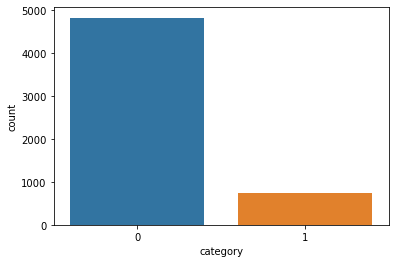

In [11]:
sns.countplot(df["category"])



# text processing

In [12]:
messages=df["message"]

In [13]:
messages

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [14]:
from nltk.tokenize import TweetTokenizer
tk= TweetTokenizer()
messages=messages.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))
messages

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568               Will Ì_ b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: message, Length: 5572, dtype: object

# removing special characters

In [15]:
messages=messages.str.replace(' [^a-zA-Z0-9]=',' ')
messages

C:\Users\kores\AppData\Local\Temp\ipykernel_16060\2730836849.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  messages=messages.str.replace(' [^a-zA-Z0-9]=',' ')


0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568               Will Ì_ b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: message, Length: 5572, dtype: object

# splitting into x and y

In [16]:
x=messages
y=df["category"]

# model  building

In [17]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=101)



In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:


feature_ex=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
x_trainfe=feature_ex.fit_transform(x_train)
x_testfe=feature_ex.transform(x_test)

y_train=y_train.astype('int')
y_test=y_test.astype('int')


In [20]:
print(x_train)

1398    No did you check ? I got his detailed message now
1084    For me the love should start with attraction ....
1086                 I don't think he has spatula hands !
2655                  Great ! I have to run now so ttyl !
1059    EASTENDERS TV Quiz . What FLOWER does DOT comp...
                              ...                        
4171                              Sorry , I'll call later
599               I'm going out to buy mum's present ar .
1361    Shuhui say change 2 suntec steamboat ? U noe w...
1547    Bishan lar nearer ... No need buy so early cos...
4959                 I want <#> rs da :) do you have it ?
Name: message, Length: 4457, dtype: object


In [21]:
print(x_trainfe)

  (0, 4352)	0.3764639739072418
  (0, 2257)	0.6530798272448365
  (0, 3146)	0.316493068262804
  (0, 1740)	0.4525550012606886
  (0, 2282)	0.35607263889739715
  (1, 3938)	0.08141152085035304
  (1, 6550)	0.08173874962202982
  (1, 4126)	0.10309555998160094
  (1, 5753)	0.08646199377102853
  (1, 4019)	0.0718442532913686
  (1, 3112)	0.10490554734129488
  (1, 6600)	0.10922287566545023
  (1, 4479)	0.09034982494736565
  (1, 5721)	0.1496171302568459
  (1, 4236)	0.1496171302568459
  (1, 2106)	0.1496171302568459
  (1, 1767)	0.13770956101814316
  (1, 4238)	0.1100610414609828
  (1, 5203)	0.1496171302568459
  (1, 5996)	0.14265164877746403
  (1, 5089)	0.1496171302568459
  (1, 3907)	0.1307440795387613
  (1, 1294)	0.22778884508147546
  (1, 3087)	0.10555388809943525
  (1, 5302)	0.1496171302568459
  :	:
  (4452, 3938)	0.6073959754555085
  (4453, 1063)	0.5152677535591466
  (4453, 5231)	0.524663395977397
  (4453, 4525)	0.4622302604207135
  (4453, 1573)	0.38222223061995825
  (4453, 3118)	0.3153994543985111
  (4

In [22]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()

In [23]:
clf.fit(x_trainfe,y_train)

MultinomialNB()

In [24]:
y_pred=clf.predict(x_testfe)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)


0.9704035874439462